In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy import fftpack
from pylab import imshow
from scipy.interpolate import UnivariateSpline
from pylab import imread
from matplotlib.colors import LogNorm
import seaborn as sns

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [3]:
#Loading max speeds
max_speeds = np.load('max-speeds.npy')
#Finding the years
years_nb = max_speeds.shape[0]

In [4]:
#Calculating the cumulutive probability
cprob = (np.arange(years_nb) + 1)/(years_nb + 1)

In [5]:
#Sorting the speeds
max_speeds_sort=np.sort(max_speeds)

In [6]:
#Fitting the cumulative probability to the sorted max speeds
q_dist=UnivariateSpline(cprob,max_speeds_sort)

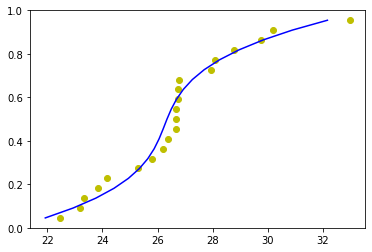

In [7]:
#Plotting the results
plt.scatter(max_speeds_sort,cprob, color="y")
plt.plot(q_dist(cprob),cprob,color="b")

In [8]:
#Predicting the top wind in 50 years
top_wind=q_dist(0.98)
print(top_wind)

32.97989844019469


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [9]:
#Creating arrays
maxtemp=[17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
mintemp=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months=np.arange(12)

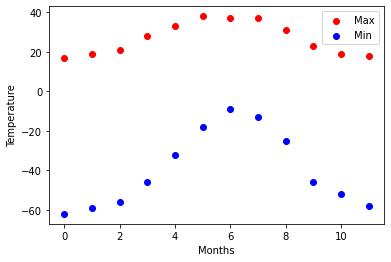

In [10]:
#Plotting the values
plt.scatter(months,maxtemp,color='r',label="Max")
plt.scatter(months,mintemp,color='b',label="Min")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()

In [11]:
#Defining the function to fit
def temp_func(t, A, t_off, v_off):
    return v_off+A*np.cos((t+t_off)* 2 * np.pi / t.max())

In [12]:
#Fitting the function with the two parameter set and the two temperatures
params1, params_covariance1 = optimize.curve_fit(temp_func, months, maxtemp,[10, -2.5, 8])
params2, params_covariance2 = optimize.curve_fit(temp_func, months, mintemp,[17, -3,8])

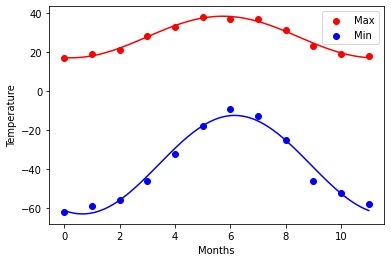

In [13]:
#Plot of the points and the fitted function
t=np.linspace(0,11,100)
plt.scatter(months,maxtemp,color='r',label="Max")
plt.scatter(months,mintemp,color='b',label="Min")
plt.plot(t,temp_func(t,params1[0],params1[1],params1[2]),color='r')
plt.plot(t,temp_func(t,params2[0],params2[1],params2[2]),color='b')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()
#The fit is reasonable but it has a strong dependence on the starting values

In [14]:
print((params1[1]-params2[1])/(np.sqrt(params_covariance1[1,1]**2+params_covariance2[1,1]**2)))
#The two parameters are pretty much incompatible.

38.344373693810965


3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [162]:
#Defining the function
def f(x,y):
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2
#Defining the function to minimize
def f2(xarr):
    x=xarr[0]
    y=xarr[1]
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2

In [164]:
#Defining the parameters bound and the meshgrid
x1=np.arange(-2,2,0.01)
y1=np.arange(-1,1,0.01)
XX,YY=np.meshgrid(x1,y1)

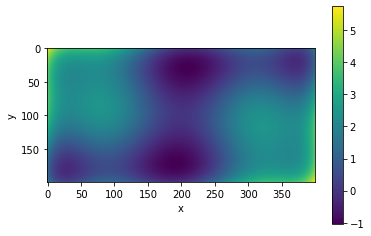

In [168]:
#Showing the heatmap for the function
imshow(f(XX,YY))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

In [173]:
#Minimization function
val=optimize.minimize(f2,x0=[0.,-0.5],bounds=[[-2,2],[-1,1]])

In [175]:
print("The minimum position is",val["x"][0],",",val["x"][1])

The minimum position is 0.08984198346231073 , -0.7126564006047424


In [176]:
#If starts from 0,0 stops at 0,0 and doesn't move, because it's a saddle point
val=optimize.minimize(f2,x0=[0,0],bounds=[[-2,2],[-1,1]])
print("The minimum position is",val["x"][0],",",val["x"][1])

The minimum position is 0.0 , 0.0


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [11]:
df=pd.read_csv("populations.txt", delimiter="	")

The peaking frequence is: 0.09523809523809523


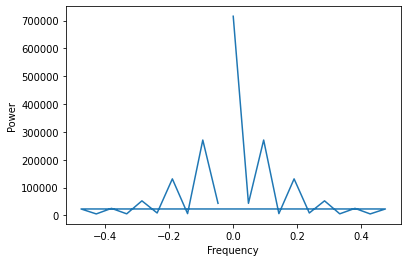

In [12]:
#Finding the power spectrum for hares
sig=np.asarray(df["hare"])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=1)
plt.plot(sample_freq, power)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
plt.xlabel("Frequency")
plt.ylabel("Power")
print("The peaking frequence is:",peak_freq)

The peaking frequence is: 0.09523809523809523


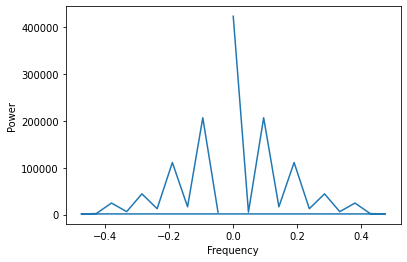

In [13]:
#Finding the power spectrum for lynxes
sig=np.asarray(df["lynx"])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=1)
plt.plot(sample_freq, power)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
plt.xlabel("Frequency")
plt.ylabel("Power")
print("The peaking frequence is:",peak_freq)

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

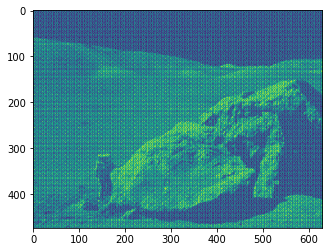

In [49]:
#Importing and visualizing the image
im=imread("moonlanding.png")
imshow(im)

In [3]:
#Making the 2D fourier trasform and calculating the power
sig_fft = fftpack.fft2(im)
power = np.abs(sig_fft)

<AxesSubplot:>

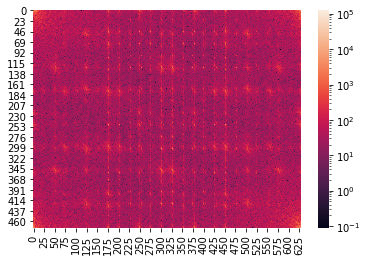

In [4]:
#Visualing the power using a logaritmic heatmap to overcome the difficulties related to the high span of frequencies
sns.heatmap(power,norm=LogNorm())

In [53]:
#Cutting the image at a reasonable frequency
sig_cut=sig_fft.copy()
sig_cut[np.abs(sig_cut)>2000]=0

In [54]:
#Doing the inverse fourier transform
im2=fftpack.ifft2(sig_cut).real

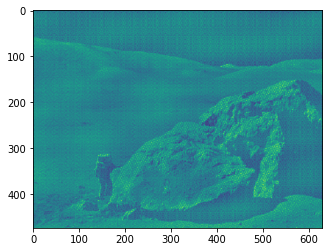

In [55]:
#Showing the cleaner image
imshow(im2)